In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Histogram  
* Grafik yang mereperesentasikan distribusi/probability distribusi dari suatu data  
* biasanya dipakai untuk menampilkan distribusi data continuous
* pada histogram, 1 bar/ satu kotak, disebut sebagai bin yang merepresentasikan frekuensi dari data pada range tertentu.

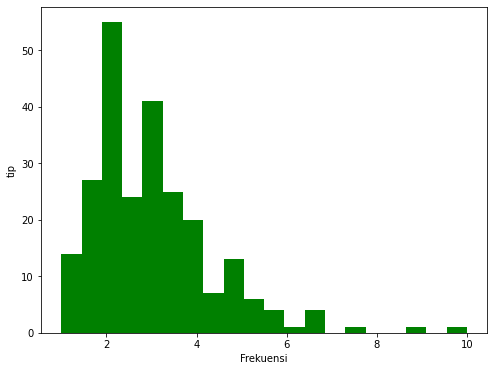

In [19]:
# Pandas

tips['tip'].hist(bins=20, figsize=(8,6), color='green', grid=False)
plt.xlabel('Frekuensi')
plt.ylabel('tip')
plt.show()
# bins untuk menentukan jumlah bin

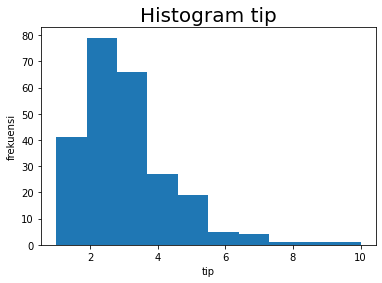

In [18]:
# Matplotlib

plt.hist(tips['tip'])
plt.title('Histogram tip', size=20)
plt.xlabel('tip')
plt.ylabel('frekuensi')
plt.show()

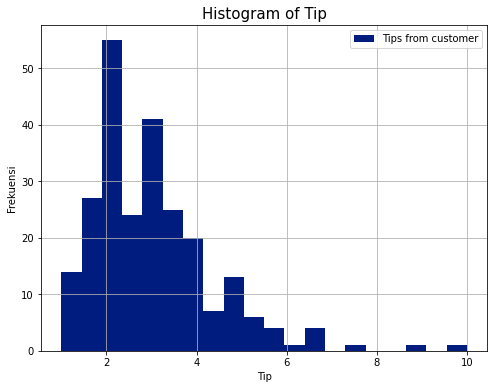

<Figure size 432x288 with 0 Axes>

In [35]:
plt.style.use('seaborn-dark-palette') # mengatur style yang ingin dipakai. Seterusnya, grafik yang dibuat akan memakai style ini
plt.figure(figsize=(8,6))
plt.hist(tips['tip'],bins=20)
plt.title('Histogram of Tip', size=15)
plt.xlabel('Tip')
plt.ylabel('Frekuensi')
plt.legend(['Tips from customer'], loc=-0) #parameter loc untuk mengatur lokasi legend. 0= lokasi yang dianggap terbaik
plt.grid(True) #mengatur grid pada figure, True, ada grid
plt.savefig('histTip.png') #untuk menyimpan gambar ke format png. 
# Lakukan sebelum .show(), kalau setelah akan menyimpan gambar kosong
plt.show()


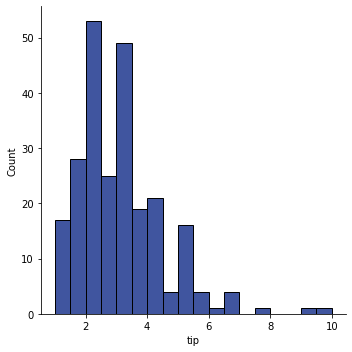

In [41]:
# seaborn
sns.displot(tips['tip']) 
# sns.displot(data=tips, x='tip',y='total_bill',kind='kde')#bisa dipakai untuk bivariate
# kde= kernel density estimate, estimasi density distribusi

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


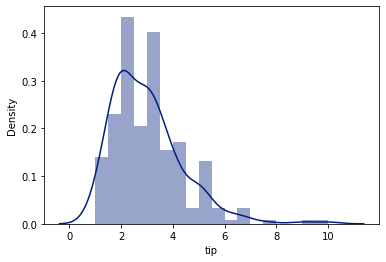

In [37]:
sns.distplot(tips['tip']) # akan dihilangkan

Text(0.5, 1.0, 'Histogram of Tip')

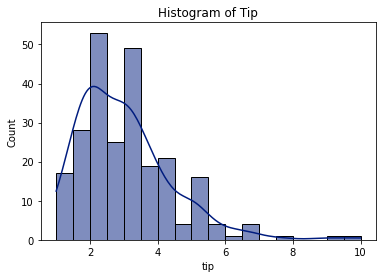

In [46]:
sns.histplot(tips['tip'], kde=True) # histogram biasa
# kde=True, tambah garis probability distribusi
plt.title('Histogram of Tip')

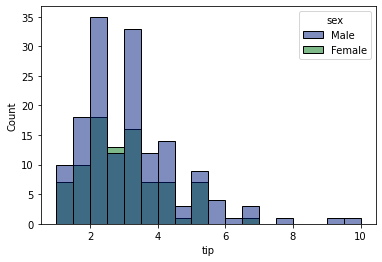

In [48]:
sns.histplot(data=tips, x='tip',hue='sex') 
#hue: untuk membuat beberapa plot berdasarkan data kualitatif tertentu

In [49]:
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


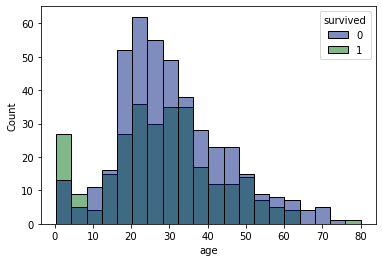

In [50]:
sns.histplot(data=titanic, x='age',hue='survived') # di sini jelas kalau pada umur 0-10 lebih banyak yang survive

# Boxplot
* merangkum data dengan 5 nilai:
    * min/batas bawah
    * maks/batas atas
    * Q1
    * Q2/ median
    * Q3
* kotak pada boxplot merupakan IQR(Q3-Q1)
* Bisa dipakai untuk:
    * melihat distribusi data (melalui skewness)
    * melihat central tendensi/ spreadness of data
    * deteksi outlier
* bisa dipakai untuk membandingkan data berdasarkan grup tertentu (biasanya dipasangkan dengan uji kruskal wallis/ mann withney)

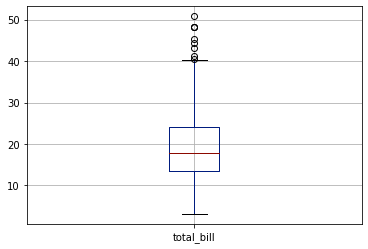

In [55]:
# Pandas

tips.boxplot('total_bill')
# plt.title('Boxplot of Total Bill', size=15)
plt.show()

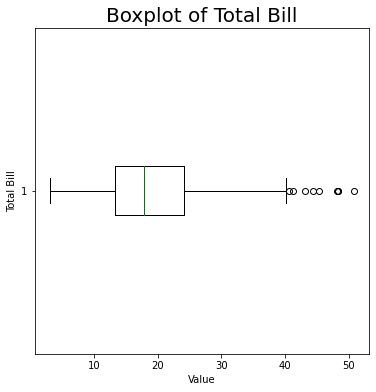

In [62]:
# matplotlib

plt.figure(figsize=(6,6))
plt.boxplot(tips['total_bill'], vert=False) #vert: orientasi dari boxplot, vertikal atau horizontal
plt.title('Boxplot of Total Bill', size=20)
plt.ylabel('Total Bill')
plt.xlabel('Value')
plt.show()

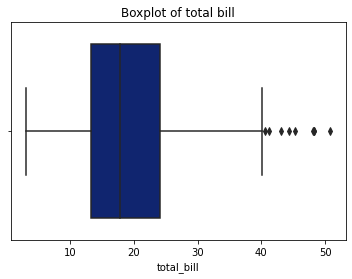

In [67]:
# seaborn
sns.boxplot(data=tips, x='total_bill') # paramater y kalau mau horizontal, x kalau vertikal
plt.title('Boxplot of total bill')
plt.show()

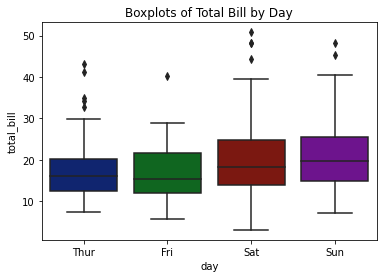

In [75]:
# boxplot berdasarkan kategori tertentu/ visualisasi untuk kruskal wallis total bill berdasarkan day
sns.boxplot(data=tips, y='total_bill', x='day') # x dan y dibalik untuk menentukan orientasi
# dipastikan salah satu dari x/y memiliki data kategorikal
plt.title('Boxplots of Total Bill by Day')
plt.show()

# Lineplot
* Biasanya dipakai untuk melihat trend dalam kurun waktu tertentu
* Time series analisis
* Data di sumbu X adalah data waktu (tahun/bulan/hari/jam, dst)

In [76]:
flights= sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


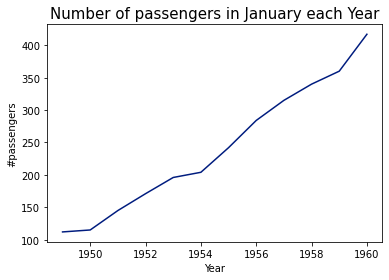

In [79]:
# Matplotlib

plt.plot(
    flights[flights['month']=='Jan']['year'],
    flights[flights['month']=='Jan']['passengers']
)
plt.title('Number of passengers in January each Year', size=15)
plt.xlabel('Year')
plt.ylabel('#passengers')
plt.show()

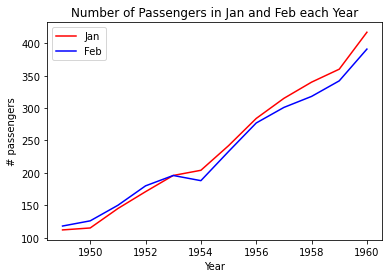

In [81]:
# bandingkan jumlah penumpang di bulan Januari dan Februari tiap tahunnya
x1=flights[flights['month']=='Jan']['year']
x2=flights[flights['month']=='Feb']['year']
y1=flights[flights['month']=='Jan']['passengers']
y2=flights[flights['month']=='Feb']['passengers']

plt.plot(
    x1,y1,'red',
    x2,y2,'blue'
)
plt.title('Number of Passengers in Jan and Feb each Year')
plt.xlabel('Year')
plt.ylabel('# passengers')

plt.legend(['Jan','Feb'],loc=0)
plt.show()

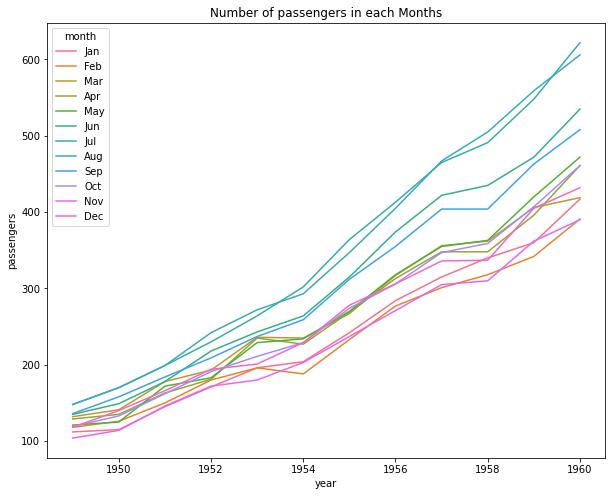

In [84]:
# Seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data=flights,x='year',y='passengers', hue='month')
plt.title('Number of passengers in each Months')
plt.show()

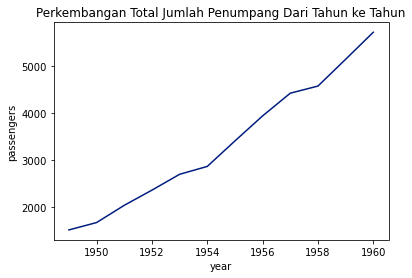

In [91]:
sns.lineplot(data=flights,x='year',y='passengers', estimator='sum', ci=None)
plt.title('Perkembangan Total Jumlah Penumpang Dari Tahun ke Tahun')
plt.show()
# menampilkan agregasi (default=rata-rata) dari jumlah penumpang tiap tahunnya
# agregasi yang dipakai bisa diatur dalam paramater estimator
# bayangan di sekitar garis adalah confidence interval dari agregasi, bisa diatur di parameter ci. default, sd (standard deviasi)

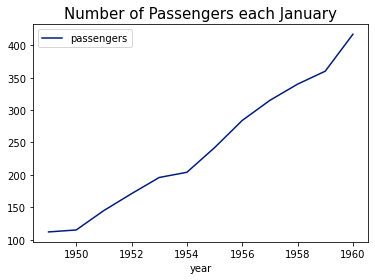

In [94]:
# Pandas
df_january=flights[flights['month']=='Jan'] #data hanya bulan januari
df_january.plot.line(x='year',y='passengers')
plt.title('Number of Passengers each January', size=15)
plt.show()

# Scatterplot 
* grafik sebaran data 2 variabel numerik
* biasa dipakai untuk melihat hubungan/tren (korelasi) antara 2 data numerik
* tiap titik mewakili 1 observasi
* bisa juga dipakai untuk mendeteksi outlier (kontekstual)

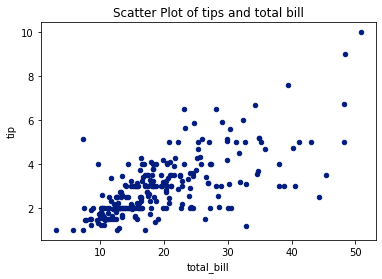

In [98]:
# Pandas
tips.plot.scatter(x='total_bill', y='tip')
plt.title('Scatter Plot of tips and total bill')
plt.show()

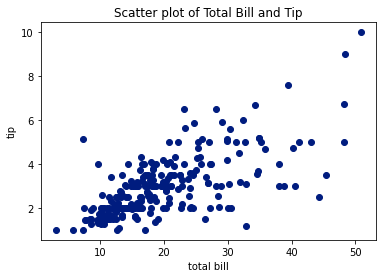

In [100]:
# Matplotlib
plt.scatter(tips['total_bill'],tips['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Scatter plot of Total Bill and Tip')
plt.show()

Text(0.5, 1.0, 'Scatter of Total Bill and Tips by Day')

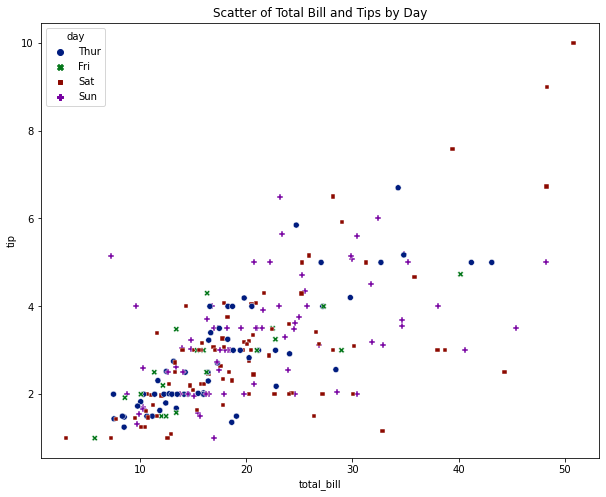

In [108]:
# seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='day')
plt.title('Scatter of Total Bill and Tips by Day')
# kita bisa menambahkan variabel kategorikal melalui parameter hue, style, dan size
# tapi tidak disarankan dipakai semua karena intepretasi jadi sulit

# Barplot
* biasa dipakai untuk membandingkan data antar kelompok
* Visualisasi yang tepat untuk t test dan f test 
* pakai jika 1 variable adalah variabel numerik dan yang lain adalah kategorikal

In [110]:
# Pandas
tips_by_day=tips[['tip','day']].groupby('day',as_index=False).mean()
tips_by_day

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


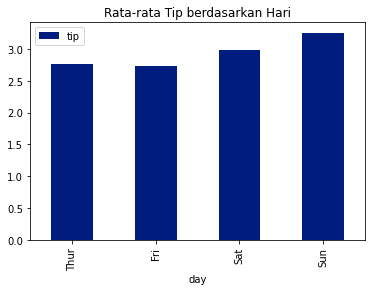

In [111]:
tips_by_day.plot.bar(x='day',y='tip')
plt.title('Rata-rata Tip berdasarkan Hari')
plt.show()

In [112]:
# matplotlib
tips_by_day

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


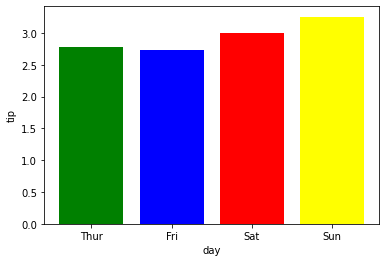

In [126]:
x=tips_by_day['day']
y=tips_by_day['tip']
plt.bar(x,y,color=['green','blue','red','yellow'])
plt.xlabel('day')
plt.ylabel('tip')
plt.show()

<BarContainer object of 4 artists>

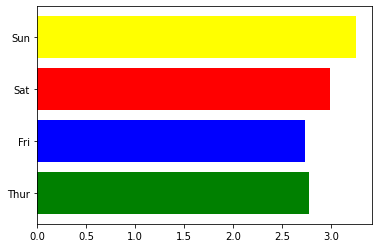

In [128]:
plt.barh(x,y,color=['green','blue','red','yellow']) #barh kalau mau barplotnya horizontal

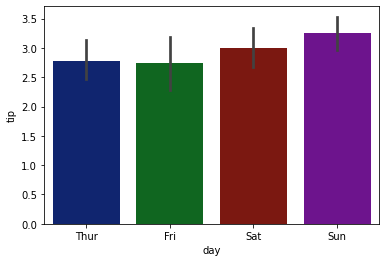

In [143]:
# seaborn
sns.barplot(data=tips, x='day',y='tip',estimator=np.mean)
# garis vertikal di tiap bar merupalan confidence interval, diatur di parameter ci
#estimator untuk mengatur agregat yang dipakai untuk membuat barplot, default: rata-rata

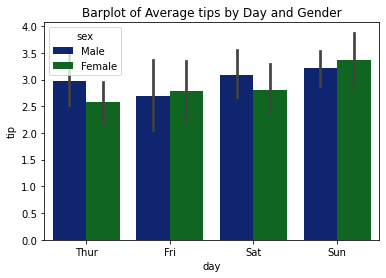

In [146]:
sns.barplot(data=tips, x='day',y='tip',hue='sex')
plt.title('Barplot of Average tips by Day and Gender')
plt.show()

In [147]:
# countplot: menghitung jumlah kemunculan 2 data kategorikal
# visualisasi untuk crosstab

pd.crosstab(tips['sex'], tips['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


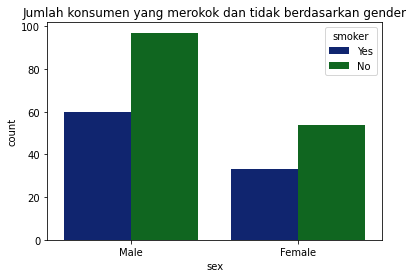

In [152]:
sns.countplot(data=tips,x='sex',hue='smoker')
plt.title('Jumlah konsumen yang merokok dan tidak berdasarkan gender')
plt.show()

In [171]:
ct=pd.crosstab(tips['sex'], tips['smoker'],normalize='index')
total=ct['Yes']+ct['No']
total

sex
Male      1.0
Female    1.0
dtype: float64

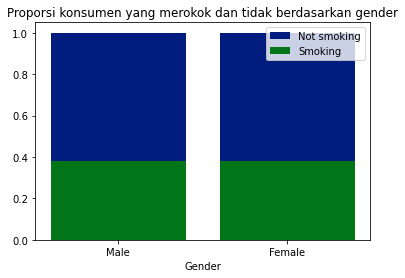

In [178]:
plt.bar(np.arange(0,2),total)
plt.bar(np.arange(0,2),ct['Yes'])
plt.xlabel('Gender')
plt.xticks((0,1),['Male','Female'])
plt.legend(['Not smoking','Smoking'])
plt.title('Proporsi konsumen yang merokok dan tidak berdasarkan gender')
plt.show()

In [173]:
ct

smoker,Yes,No
sex,,
Male,0.382166,0.617834
Female,0.379310,0.620690


In [182]:
tips.groupby('sex').sum()['tip']

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

Text(0.5, 1.0, 'Proporsi tips yang diberikan berdasarkan gender')

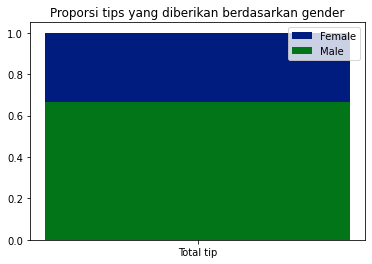

In [195]:
plt.bar(0,1)
plt.bar(0,tips.groupby('sex').sum()['tip']['Male']/tips.groupby('sex').sum()['tip'].sum())
plt.xticks([0],['Total tip'])
plt.legend(['Female','Male'])
plt.title('Proporsi tips yang diberikan berdasarkan gender')

# Pie Chart
bagan lingkaran untuk menampilkan proporsi suatu kelompok dibandingkan dengan proporsi utuh  
pastikan semua data di dalam piechart memang merepresentasikan proporsi utuh dari data.

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# matplotlib
# proporsi jumlah konsumen berdasarkan hari

day_proportion=tips['day'].value_counts().reset_index()
day_proportion #jumlah konsumen berdasarkan hari


,index,day
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


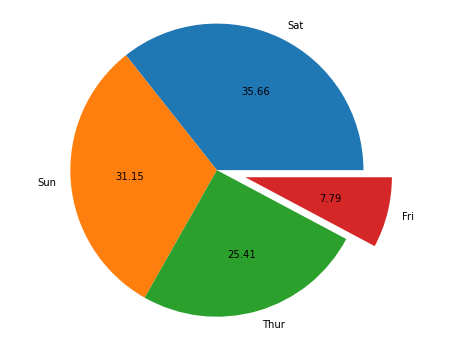

In [12]:
plt.figure(figsize=(8,6))
plt.pie(
    day_proportion['day'], #data jumlah
    labels=day_proportion['index'], #memberi label nama untuk tiap-tiap bagian
    autopct='%.2f', #memberi label nilai proporsi, %.2f adalah format penulisan berbentuk persentase, 2 angka di belakang koma
    explode=(0,0,0,0.2) #memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
)
plt.axis('equal') #agar posisi piechart di tengah
plt.show()

In [29]:
# using pandas
day_proportion=tips['day'].value_counts()
day_proportion

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [33]:
def absolute_value(val):
    return np.round(val/100*day_proportion.sum(),0) 
# pada piechart, value yang ditampilkan adalah persentase masing-masing bagian
# dengan function ini, kita mengembalikan nilai persentase itu kembali menjadi jumlah customer per hari

In [35]:
absolute_value(day_proportion)

Sat     212.0
Sun     185.0
Thur    151.0
Fri      46.0
Name: day, dtype: float64

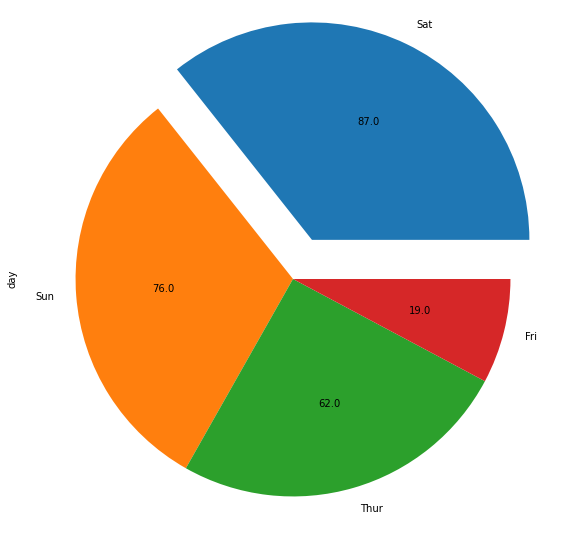

In [36]:
day_proportion.plot.pie(
    y='day',
    figsize=(10,10),
    autopct=absolute_value, #bisa masukkan function,
    explode=(0.2,0,0,0)
)

In [41]:
# seaborn tidak ada piechart

# Heatmap
teknik visualisasi yang menunjukkan nilai dari suatu fenomena dengan warna  
biasanya dipakai untuk visualisasi data/matrikx dengan jumlah besar

In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [45]:
corr_mat=tips[['total_bill','tip','size']].corr()
corr_mat

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


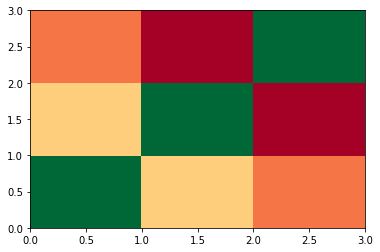

In [47]:
# using matplotlib
plt.pcolor(corr_mat,cmap='RdYlGn')

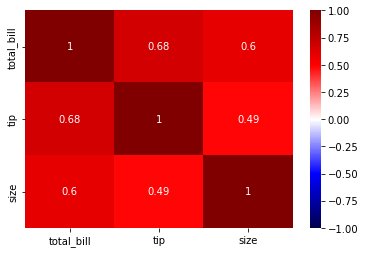

In [51]:
# using seaborn
sns.heatmap(corr_mat, annot=True, cmap='seismic', vmax=1, vmin=-1)
#annot=true: memberi anotasi nilai masing-masing matriks
# vmax dan vmin, untuk menentukan nilai maksimum dan minimum dari legend

In [68]:
flights= sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [70]:
pv_flights=flights.pivot_table(values='passengers',index='month',columns='year')
# pv_flights.head()

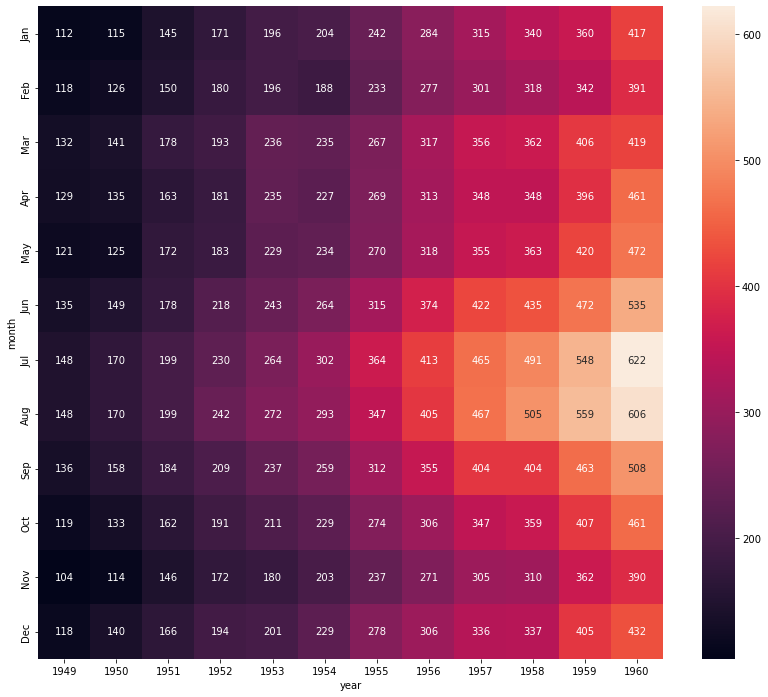

In [67]:
plt.figure(figsize=(14,12))
sns.heatmap(pv_flights, annot=True,fmt='g') #fmt, format penulisan anotasi. 'g'= format integer
plt.show()

In [72]:
titanic=sns.load_dataset('titanic')

In [73]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
missing_value=titanic[['age','embark_town','deck']].isna()

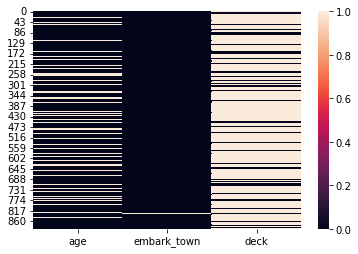

In [76]:
sns.heatmap(missing_value) #melihat distribusi dari missing value